In [68]:
import torch
import torch.nn as nn
from torch.autograd import Variable
import torch.utils.data as Data
import torchvision
import matplotlib.pyplot as plt

In [69]:
train_data = torchvision.datasets.MNIST(
    root='./mnist',
    train=True,
    transform=torchvision.transforms.ToTensor(),
    download=False
)
test_data = torchvision.datasets.MNIST(
    root='./mnist',
    train=False,
    transform=torchvision.transforms.ToTensor(),
    download=False
)
print(train_data)

Dataset MNIST
    Number of datapoints: 60000
    Root location: ./mnist
    Split: Train
    StandardTransform
Transform: ToTensor()


C:\Users\Wei\AppData\Local\Programs\Python\Python39\lib\site-packages\torchvision\datasets\mnist.py:62: UserWarning: train_data has been renamed data
  warnings.warn("train_data has been renamed data")


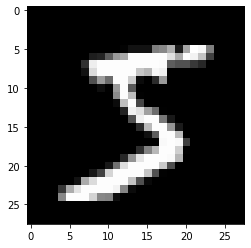

In [70]:
plt.imshow(train_data.train_data[0].numpy(),cmap='gray')
plt.show()

#show first image

In [71]:
from torch.utils.data import DataLoader
loaders = {
    'train' : torch.utils.data.DataLoader(train_data, 
                                          batch_size=100, 
                                          shuffle=True, 
                                          num_workers=1),
    
    'test'  : torch.utils.data.DataLoader(test_data, 
                                          batch_size=100, 
                                          shuffle=True, 
                                          num_workers=1),
}
loaders

{'train': <torch.utils.data.dataloader.DataLoader at 0x24f96405130>,
 'test': <torch.utils.data.dataloader.DataLoader at 0x24f964054c0>}

In [72]:
class CNN(nn.Module):
    def __init__(self):
        super(CNN, self).__init__()
        self.conv1 = nn.Sequential(
            nn.Conv2d(           
                in_channels=1,  
                out_channels=16, 
                kernel_size=5,   
                stride=1,        
                padding=2,       
            ),
            nn.ReLU(), 
            nn.MaxPool2d(kernel_size = 2),
        )
        
        self.conv2 = nn.Sequential(
            nn.Conv2d(16,32,5,1,2),  
            nn.ReLU(), 
            nn.MaxPool2d(2)   
        )
        
        self.out = nn.Linear(32*7*7, 10) 
        
    def forward(self,x):
       x = self.conv1(x)
       x = self.conv2(x)
       x = x.view(x.size(0), -1)
       output = self.out(x)
       return output

In [73]:
cnn = CNN()
print(cnn)

CNN(
  (conv1): Sequential(
    (0): Conv2d(1, 16, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2))
    (1): ReLU()
    (2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (conv2): Sequential(
    (0): Conv2d(16, 32, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2))
    (1): ReLU()
    (2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (out): Linear(in_features=1568, out_features=10, bias=True)
)


In [74]:
optimizer = torch.optim.Adam(cnn.parameters(), lr=0.01)
loss_function = nn.CrossEntropyLoss()

In [81]:
num_epochs = 15
total_step = len(loaders['train'])
for epoch in range(num_epochs):
    for step, (x, y) in enumerate(loaders['train']):
        b_x = Variable(x, requires_grad=False)
        b_y = Variable(y, requires_grad=False)

        output = cnn(b_x)          
        loss = loss_function(output, b_y)
        optimizer.zero_grad()      
        loss.backward()            
        optimizer.step()       
        if (step+1) % 100 == 0:
            print ('Epoch [{}/{}], Step [{}/{}], Loss: {:.4f}'.format(epoch + 1, num_epochs, step + 1, total_step, loss.item()))

Epoch [1/15], Step [100/600], Loss: 0.1015
Epoch [1/15], Step [200/600], Loss: 0.1232
Epoch [1/15], Step [300/600], Loss: 0.0297
Epoch [1/15], Step [400/600], Loss: 0.1147
Epoch [1/15], Step [500/600], Loss: 0.0632
Epoch [1/15], Step [600/600], Loss: 0.1043
Epoch [2/15], Step [100/600], Loss: 0.0267
Epoch [2/15], Step [200/600], Loss: 0.0081
Epoch [2/15], Step [300/600], Loss: 0.0645
Epoch [2/15], Step [400/600], Loss: 0.0173
Epoch [2/15], Step [500/600], Loss: 0.0247
Epoch [2/15], Step [600/600], Loss: 0.0184
Epoch [3/15], Step [100/600], Loss: 0.0433
Epoch [3/15], Step [200/600], Loss: 0.0379
Epoch [3/15], Step [300/600], Loss: 0.0731
Epoch [3/15], Step [400/600], Loss: 0.0245
Epoch [3/15], Step [500/600], Loss: 0.1027
Epoch [3/15], Step [600/600], Loss: 0.0154
Epoch [4/15], Step [100/600], Loss: 0.0093
Epoch [4/15], Step [200/600], Loss: 0.0548
Epoch [4/15], Step [300/600], Loss: 0.0101
Epoch [4/15], Step [400/600], Loss: 0.0096
Epoch [4/15], Step [500/600], Loss: 0.0880
Epoch [4/15

In [82]:
def test():
    # Test the model
    cnn.eval()
    with torch.no_grad():
        correct = 0
        total = 0
        for images, labels in loaders['test']:
            test_output = cnn(images)
            pred_y = torch.max(test_output, 1)[1].data.squeeze()
            accuracy = (pred_y == labels).sum().item() / float(labels.size(0))

            
    print('Test Accuracy of the model on the test images: %.2f' %accuracy)

test()

Test Accuracy of the model on the test images: 0.98
